In [1]:
import pandas as pd
import numpy  as np 

import matplotlib.pyplot as plt
import statistics as stat

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setting seed

SEED = 101
np.random.seed(SEED)

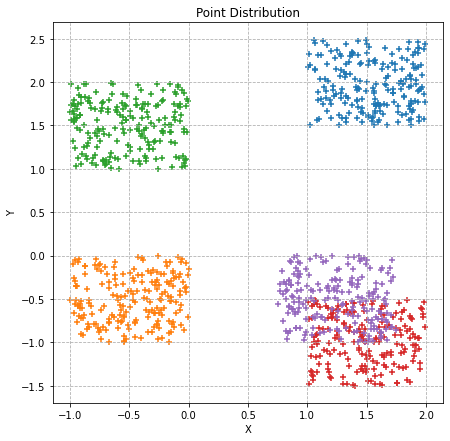

In [4]:
# Toy Dataset creation

## Creating a toy dataset

rand_values = np.random.rand(1000)

cluster_1 = np.array(list(zip( 1  + np.random.rand(200), 1.5 + np.random.rand(200))))
cluster_2 = np.array(list(zip( -1 + np.random.rand(200),  -1 + np.random.rand(200))))
cluster_3 = np.array(list(zip( -1 + np.random.rand(200),   1 + np.random.rand(200))))
cluster_4 = np.array(list(zip(  1 + np.random.rand(200),-1.5 + np.random.rand(200))))
cluster_5 = np.array(list(zip(.75 + np.random.rand(200),  -1 + np.random.rand(200))))

clusters = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5]

## Plotting the toy dataset

fig = plt.figure(figsize=(7, 7))
for cluster in clusters:
    plt.scatter(cluster[:,0], cluster[:,1], marker='+')
plt.grid(ls='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Distribution');

## Creating the toy dataframe

toy_df = pd.DataFrame()
for cluster_id, cluster in enumerate(clusters):
    sub_df = pd.DataFrame(cluster, columns=['x', 'y'])
    sub_df['cluster_id'] = cluster_id + 1
    toy_df = pd.concat([toy_df, sub_df])

In [5]:
# Minimum Distance Classifier Algorithm

## Calculating euclidean distance
def euclidean_distance(p1, p2):
    distance = np.sqrt(np.sum((p1-p2)**2))
    return distance

## Finding centroids
def find_centroids(X_train, y_train):
    class_list = np.unique(y_train)
    centroids = np.zeros((len(class_list), X_train.shape[1]))
    for i in range(len(class_list)):
        idx_list = np.where(y_train == class_list[i])[0]
        centroids[i, :] = np.mean(X_train[idx_list],axis=0)
    return centroids

# Producing required predictions
def mdc_predict(X_train, y_train, X_test):
    class_list = np.unique(y_train)
    centroids = find_centroids(X_train, y_train)
    
    predictions = []
    for pt_test in X_test:
        idx = np.argmin([euclidean_distance(pt_test, centroid) for centroid in centroids])
        predictions.append(class_list[idx])
    
    return predictions

In [6]:
# Train Test Split

X = toy_df.drop(['cluster_id'], axis=1)
y = toy_df['cluster_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [7]:
# Coding the confusion matrix function

import seaborn as sns

def plot_confusion_matrix(y_train, y_test, y_predicted):
    labels = list(np.unique(y_train))
    cm = confusion_matrix(y_test, y_predicted, labels=labels)
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 16})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels, rotation=0)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

In [8]:
%%time

# Our MDC algorithm

m_mdc_y_predicted = mdc_predict(X_train.values, y_train.values, X_test.values)
m_mdc_score = accuracy_score(y_test, m_mdc_y_predicted)
print(f"Our MDC Test Set Accuracy Score: {m_mdc_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Our MDC Test Set Accuracy Score: 0.916
Training Data Count: 750, %Training Data: 75.00
Test Data Count: 250, %Test Data: 25.00
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.9 ms


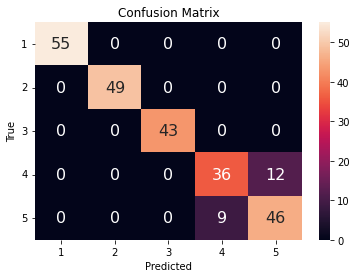

In [9]:
plot_confusion_matrix(y_train, y_test, m_mdc_y_predicted)

Text(0.5, 0, 'X')

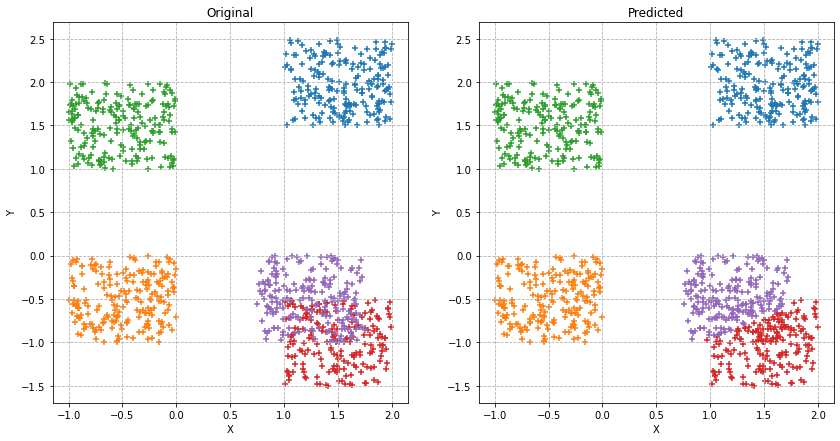

In [10]:
# Plotting Original vs Predicted for m_knn

m_mdc_y_train_predicted = mdc_predict(X_train.values, y_train.values, X_train.values)

train_df = X_train
train_df['cluster_id'] = m_mdc_y_train_predicted

test_df = X_test
test_df['cluster_id']  = m_mdc_y_predicted

main_df = pd.concat([X_train, X_test])

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

for _, data in toy_df.groupby('cluster_id'):
    axs[0].scatter(data['x'], data['y'], marker='+')
axs[0].set_title("Original")
axs[0].grid(ls='--')
axs[0].set_ylabel('Y')
axs[0].set_xlabel('X')

for _, data in main_df.groupby('cluster_id'):
    axs[1].scatter(data['x'], data['y'], marker='+')
axs[1].set_title("Predicted")
axs[1].grid(ls='--')
axs[1].set_ylabel('Y')
axs[1].set_xlabel('X')

In [11]:
%%time

# Sci-Kit Learn's NearestCentroid Algorithm

nc_clf = NearestCentroid()
nc_clf.fit(X_train, y_train)
sklearn_y_predicted = nc_clf.predict(X_test)
sklearn_y_predicted_score = accuracy_score(y_test, sklearn_y_predicted)
print(f"Sklearn's MDC Test Set Accuracy Score: {sklearn_y_predicted_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Sklearn's MDC Test Set Accuracy Score: 0.916
Training Data Count: 750, %Training Data: 75.00
Test Data Count: 250, %Test Data: 25.00
CPU times: user 2.15 ms, sys: 2.32 ms, total: 4.47 ms
Wall time: 4.24 ms


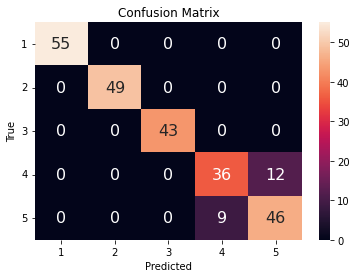

In [12]:
plot_confusion_matrix(y_train, y_test, sklearn_y_predicted)

In [13]:
# Loading Iris dataset

In [14]:
from sklearn.datasets import load_iris

irisData = load_iris()
 
X = irisData.data
y = irisData.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [15]:
%%time

# Our MDC algorithm

m_mdc_y_predicted = mdc_predict(X_train, y_train, X_test)
m_mdc_score = accuracy_score(y_test, m_mdc_y_predicted)
print(f"Our MDC Test Set Accuracy Score: {m_mdc_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Our MDC Test Set Accuracy Score: 0.921
Training Data Count: 112, %Training Data: 74.67
Test Data Count: 38, %Test Data: 25.33
CPU times: user 1.05 ms, sys: 913 µs, total: 1.96 ms
Wall time: 1.68 ms


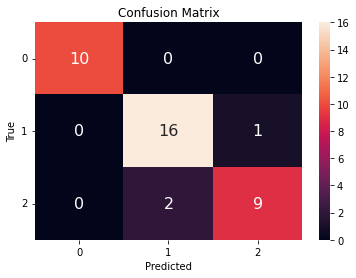

In [16]:
plot_confusion_matrix(y_train, y_test, m_mdc_y_predicted)

In [17]:
%%time

# Sci-Kit Learn's NearestCentroid Algorithm

nc_clf = NearestCentroid()
nc_clf.fit(X_train, y_train)
sklearn_y_predicted = nc_clf.predict(X_test)
sklearn_y_predicted_score = accuracy_score(y_test, sklearn_y_predicted)
print(f"Sklearn's MDC Test Set Accuracy Score: {sklearn_y_predicted_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Sklearn's MDC Test Set Accuracy Score: 0.921
Training Data Count: 112, %Training Data: 74.67
Test Data Count: 38, %Test Data: 25.33
CPU times: user 505 µs, sys: 425 µs, total: 930 µs
Wall time: 755 µs


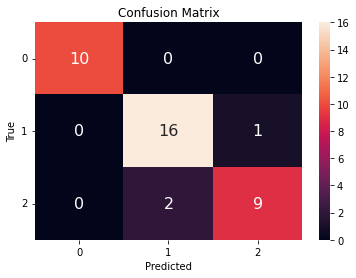

In [18]:
plot_confusion_matrix(y_train, y_test, sklearn_y_predicted)

In [19]:
# Loading Car dataset

In [20]:
carData = pd.read_csv('./car.data', encoding='utf-8', header=None)

carData.columns = ['buying', 'maintainence', 'doors', 'persons', 'lug_boot', 'safety', 'class']
carData = carData.replace({"class":{"unacc": 4, "acc": 3,'good': 2,'vgood':1}})

X = pd.get_dummies(carData.drop('class', axis=1))
y = carData['class']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [21]:
%%time

# Our MDC algorithm

m_mdc_y_predicted = mdc_predict(X_train.values, y_train.values, X_test.values)
m_mdc_score = accuracy_score(y_test, m_mdc_y_predicted)
print(f"Our MDC Test Set Accuracy Score: {m_mdc_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Our MDC Test Set Accuracy Score: 0.708
Training Data Count: 1296, %Training Data: 75.00
Test Data Count: 432, %Test Data: 25.00
CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 19.2 ms


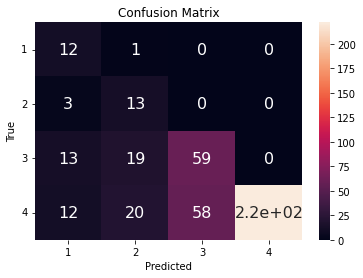

In [22]:
plot_confusion_matrix(y_train, y_test, m_mdc_y_predicted)

In [23]:
%%time

# Sci-Kit Learn's NearestCentroid Algorithm

nc_clf = NearestCentroid()
nc_clf.fit(X_train, y_train)
sklearn_y_predicted = nc_clf.predict(X_test)
sklearn_y_predicted_score = accuracy_score(y_test, sklearn_y_predicted)
print(f"Sklearn's MDC Test Set Accuracy Score: {sklearn_y_predicted_score:.3f}")
print(f"Training Data Count: {len(X_train)}, %Training Data: {100 * len(X_train)/len(X):.2f}")
print(f"Test Data Count: {len(X_test)}, %Test Data: {100 * len(X_test)/len(X):.2f}")

Sklearn's MDC Test Set Accuracy Score: 0.708
Training Data Count: 1296, %Training Data: 75.00
Test Data Count: 432, %Test Data: 25.00
CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 3.17 ms


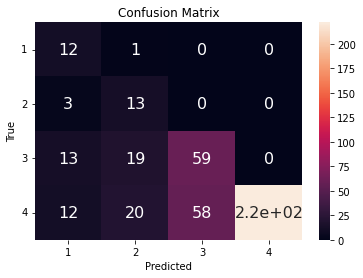

In [24]:
plot_confusion_matrix(y_train, y_test, sklearn_y_predicted)